In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""**Load the data file **"""

telco_base_data = pd.read_excel('/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx')

In [3]:
"""Look at the top 5 records of data"""

telco_base_data.head(5)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
"""Check the various attributes of data like shape (rows and cols), Columns, datatypes"""

telco_base_data.shape

(7043, 33)

In [5]:
telco_base_data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
# Checking the data types of all the columns
telco_base_data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [7]:
telco_base_data.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
telco_base_data['Senior Citizen'].value_counts()



No     5901
Yes    1142
Name: Senior Citizen, dtype: int64

In [9]:
telco_base_data['Tenure Months']

0        2
1        2
2        8
3       28
4       49
        ..
7038    72
7039    24
7040    72
7041    11
7042    66
Name: Tenure Months, Length: 7043, dtype: int64

In [10]:
# Check the descriptive statistics of numeric variables
telco_base_data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


"""SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month
"""


0    5174
1    1869
Name: Churn Value, dtype: int64
0    73.46
1    26.54
Name: Churn Value, dtype: float64


<Axes: >

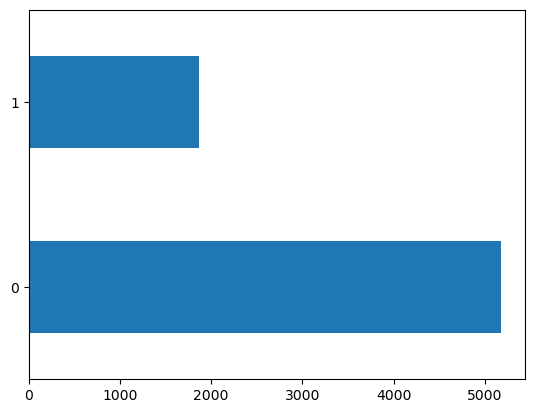

In [11]:
print(telco_base_data['Churn Value'].value_counts())
print(telco_base_data['Churn Value'].value_counts(normalize=True).mul(100).round(2))

telco_base_data['Churn Value'].value_counts().plot(kind = 'barh')



 73% customers are active;
 27% customers have left the company

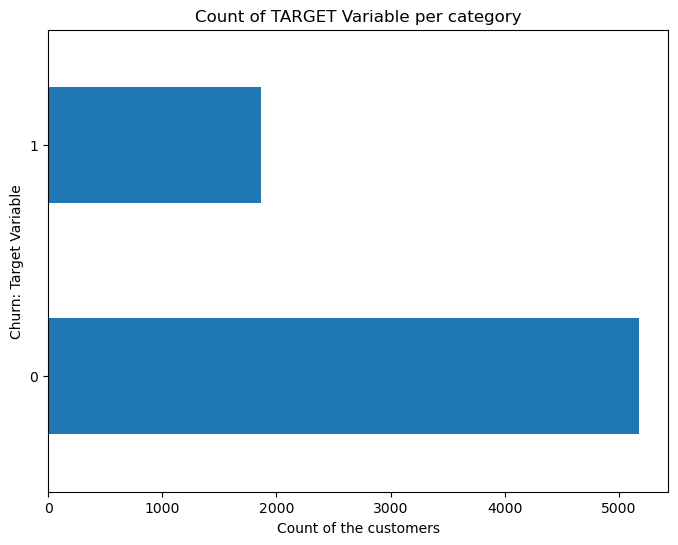

In [12]:
telco_base_data['Churn Value'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count of the customers")
plt.ylabel("Churn: Target Variable")
plt.title("Count of TARGET Variable per category");



In [13]:
print(telco_base_data['Churn Value'].value_counts(normalize=True).mul(100).round(2))


0    73.46
1    26.54
Name: Churn Value, dtype: float64


"""* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.
"""

In [14]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [15]:
telco_base_data.isnull().sum()



CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

        index    0
0  CustomerID  0.0
1       Count  0.0
2     Country  0.0
3       State  0.0
4        City  0.0
5    Zip Code  0.0
6    Lat Long  0.0


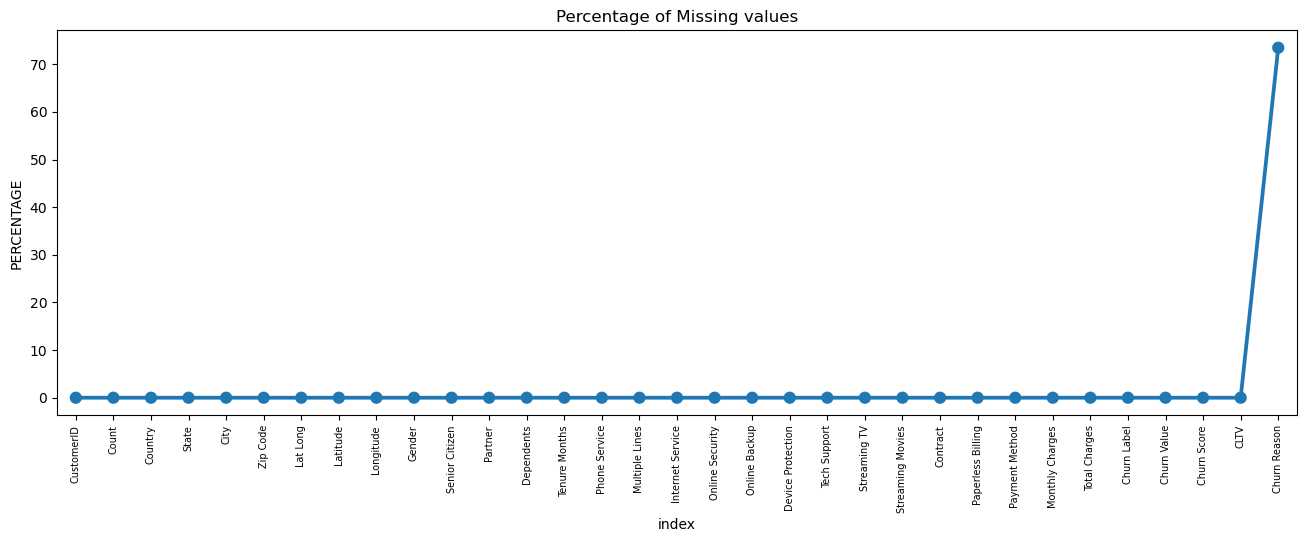

In [16]:
#print(telco_base_data.shape[0])

missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
print(missing.head(7))
plt.figure(figsize=(16,5))
ax = sns.pointplot(data=missing,x='index',y=0)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [17]:
m= pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
print(m)

                index          0
0          CustomerID   0.000000
1               Count   0.000000
2             Country   0.000000
3               State   0.000000
4                City   0.000000
5            Zip Code   0.000000
6            Lat Long   0.000000
7            Latitude   0.000000
8           Longitude   0.000000
9              Gender   0.000000
10     Senior Citizen   0.000000
11            Partner   0.000000
12         Dependents   0.000000
13      Tenure Months   0.000000
14      Phone Service   0.000000
15     Multiple Lines   0.000000
16   Internet Service   0.000000
17    Online Security   0.000000
18      Online Backup   0.000000
19  Device Protection   0.000000
20       Tech Support   0.000000
21       Streaming TV   0.000000
22   Streaming Movies   0.000000
23           Contract   0.000000
24  Paperless Billing   0.000000
25     Payment Method   0.000000
26    Monthly Charges   0.000000
27      Total Charges   0.000000
28        Churn Label   0.000000
29        

"""### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning

**1.** Create a copy of base data for manupulation & processing
"""

In [18]:
telco_data = telco_base_data.copy()

telco_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

"""
 Total Charges should be numeric amount. Let's convert it to numerical data type
"""

In [19]:
telco_data['Total Charges'] = pd.to_numeric(telco_data['Total Charges'], errors='coerce')
telco_data.isnull().sum()

telco_data.info()

telco_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


"""**3.** As we can see there are 11 missing values in TotalCharges column. Let's check these records"""

In [20]:
telco_data.loc[telco_data['Total Charges'].isnull()==True]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


"""**4. Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.
"""

In [21]:


telco_data.shape

#Removing rows: missing values
telco_data= telco_data[telco_data['Total Charges'].notna()]

In [22]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

<Axes: >

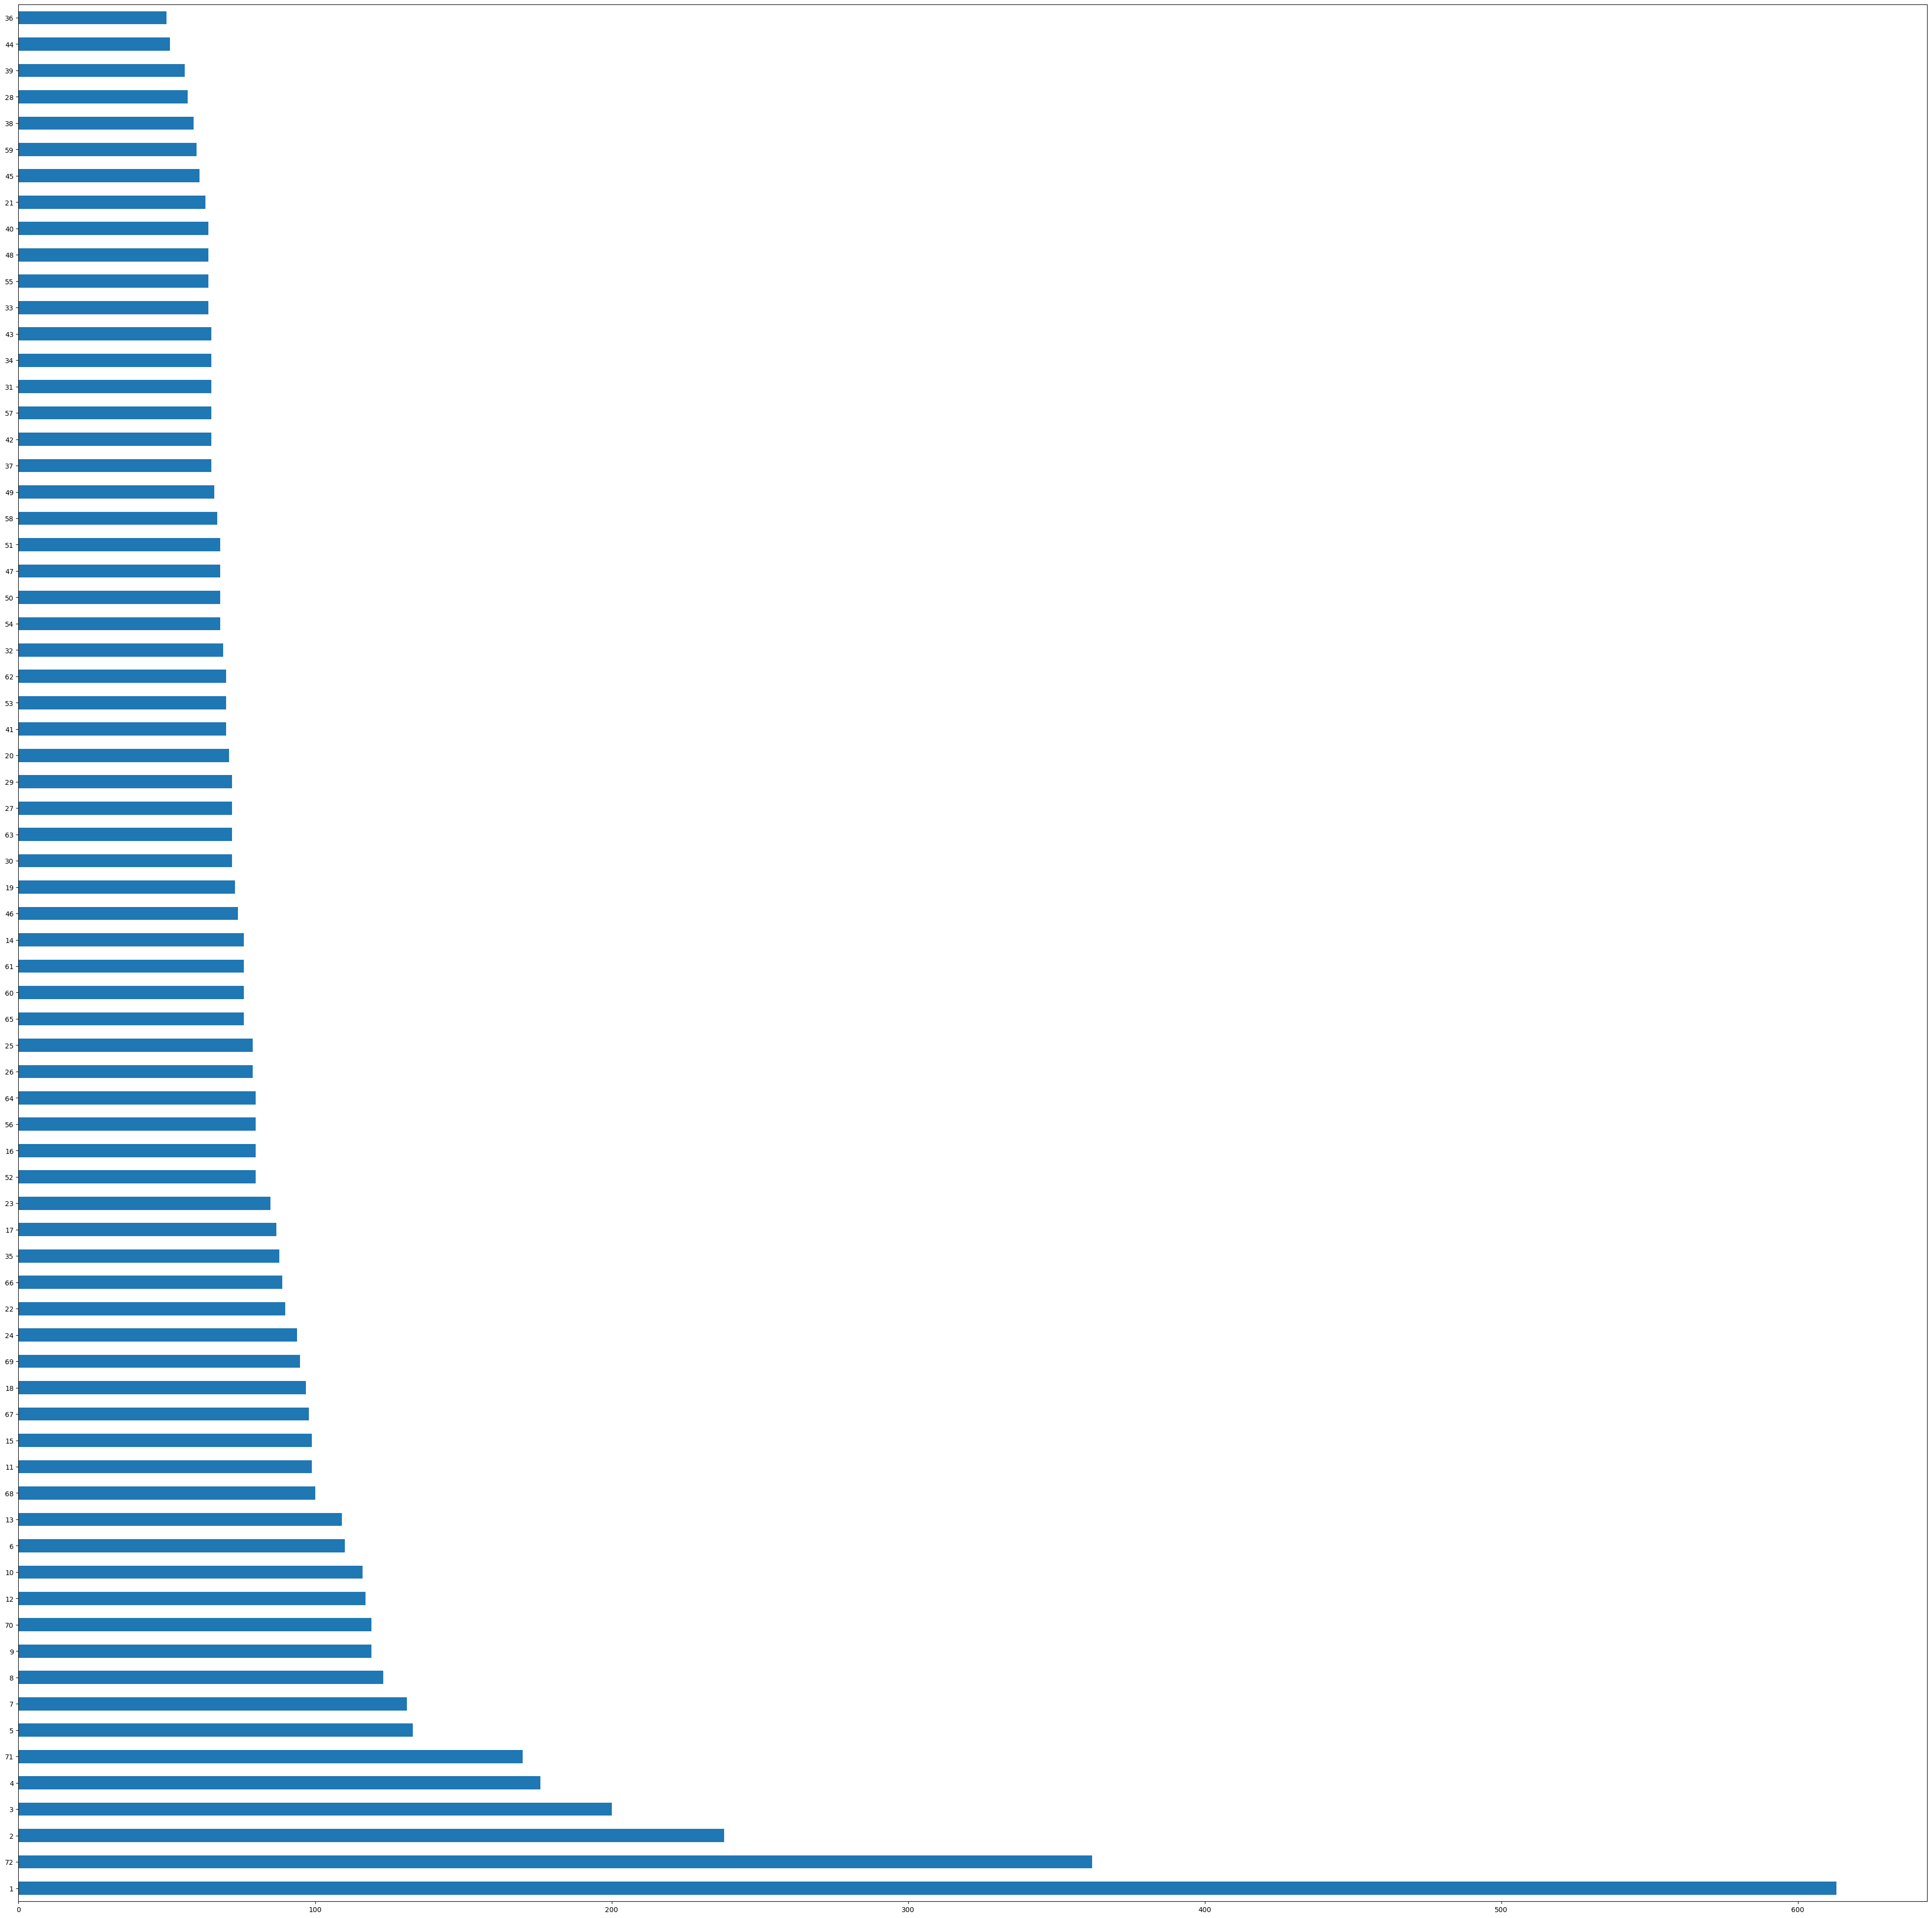

In [23]:
#telco_data.fillna(0)

telco_data.shape

telco_data['Tenure Months'].value_counts().plot(kind='barh', figsize=(50,50))

"""**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on..."""


# Get the max tenure
# print(telco_data['tenure'].max()) #72
# or check describe() function and find the value

In [24]:
labels= ['{}-{}'.format(i,i+11) for i in range(1,72,12)]

print(labels)

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']


In [25]:
telco_data['Tenure_groups']= pd.cut(labels=labels,right=False,x=telco_data['Tenure Months'],bins= range(1,80,12))
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7032 non-null   object  
 1   Count              7032 non-null   int64   
 2   Country            7032 non-null   object  
 3   State              7032 non-null   object  
 4   City               7032 non-null   object  
 5   Zip Code           7032 non-null   int64   
 6   Lat Long           7032 non-null   object  
 7   Latitude           7032 non-null   float64 
 8   Longitude          7032 non-null   float64 
 9   Gender             7032 non-null   object  
 10  Senior Citizen     7032 non-null   object  
 11  Partner            7032 non-null   object  
 12  Dependents         7032 non-null   object  
 13  Tenure Months      7032 non-null   int64   
 14  Phone Service      7032 non-null   object  
 15  Multiple Lines     7032 non-null   object  
 16  Intern

<Axes: >

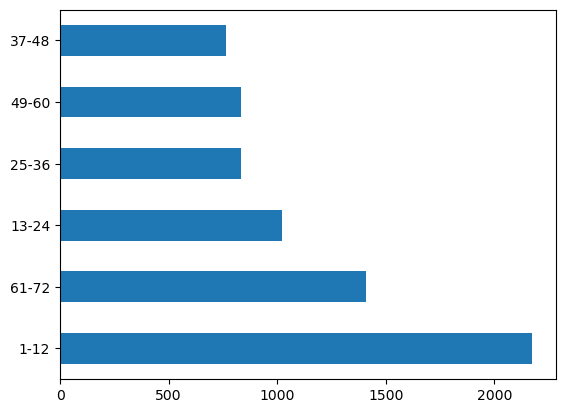

In [26]:
telco_data['Tenure_groups'].value_counts().plot(kind= 'barh')

In [27]:
#telco_data.columns

telco_data.drop(columns=['CustomerID','Tenure Months'],axis=1,inplace=True)


In [28]:
telco_data.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure_groups'],
      dtype='object')

"""## Data Exploration
**1. ** Plot distibution of individual predictors by churn
"""

<Axes: >

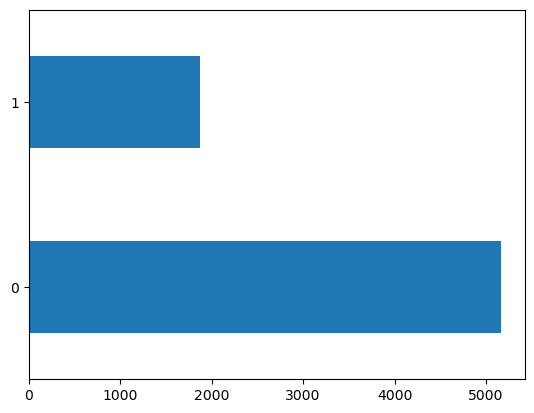

In [29]:


telco_data['Churn Value'].value_counts().plot(kind='barh')



"""### Univariate Analysis"""

In [30]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Count              7032 non-null   int64   
 1   Country            7032 non-null   object  
 2   State              7032 non-null   object  
 3   City               7032 non-null   object  
 4   Zip Code           7032 non-null   int64   
 5   Lat Long           7032 non-null   object  
 6   Latitude           7032 non-null   float64 
 7   Longitude          7032 non-null   float64 
 8   Gender             7032 non-null   object  
 9   Senior Citizen     7032 non-null   object  
 10  Partner            7032 non-null   object  
 11  Dependents         7032 non-null   object  
 12  Phone Service      7032 non-null   object  
 13  Multiple Lines     7032 non-null   object  
 14  Internet Service   7032 non-null   object  
 15  Online Security    7032 non-null   object  
 16  Online

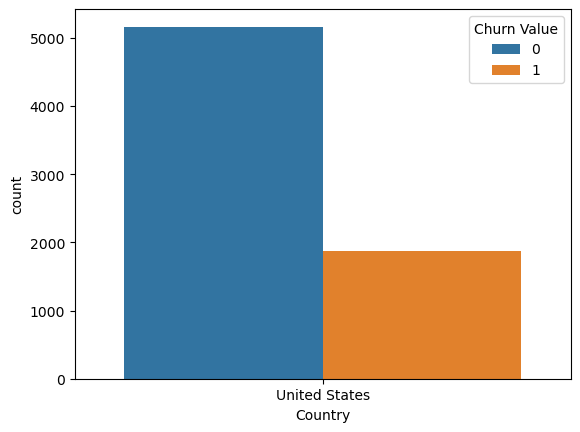

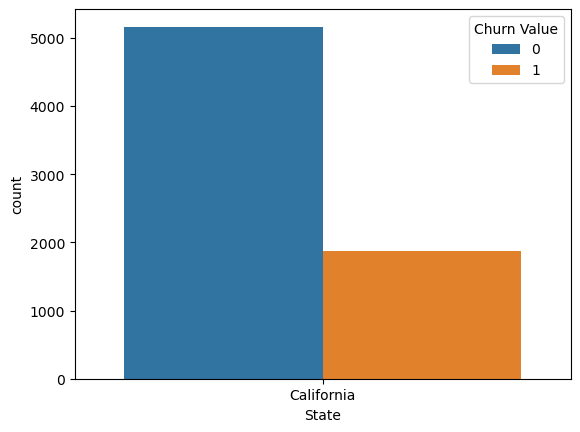

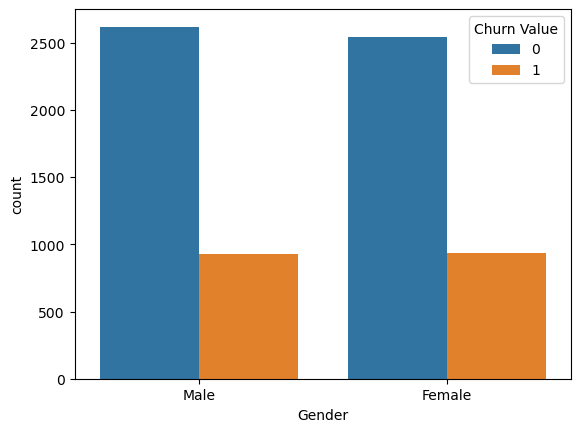

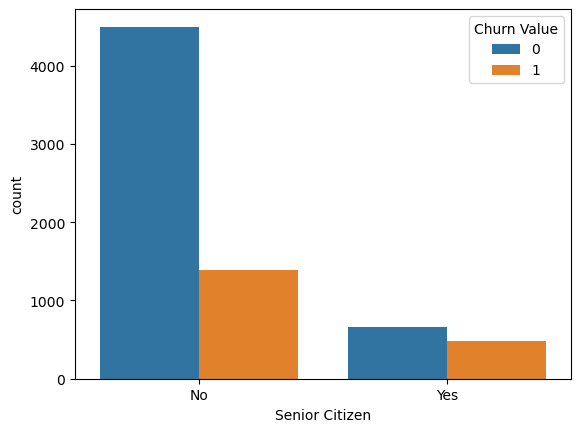

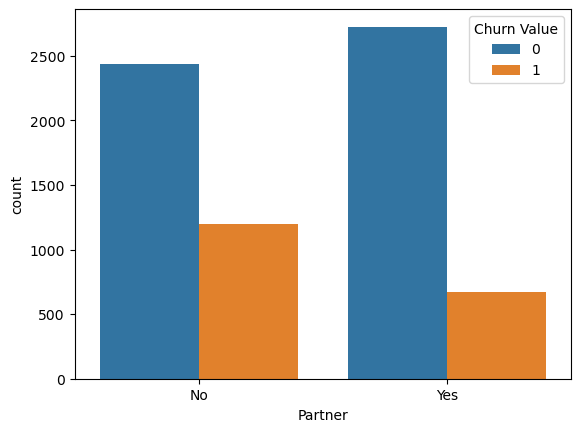

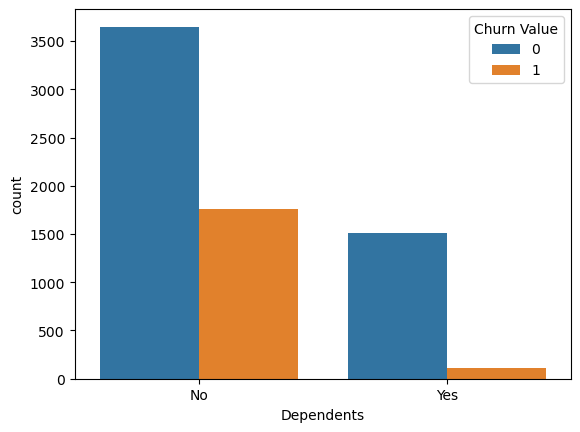

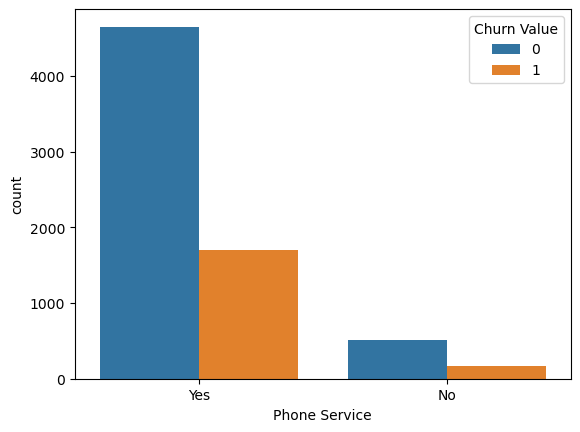

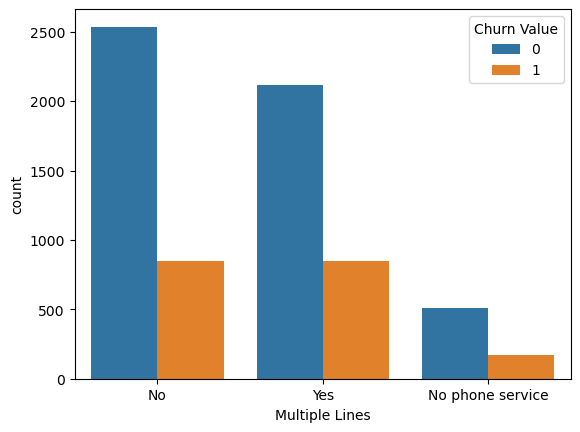

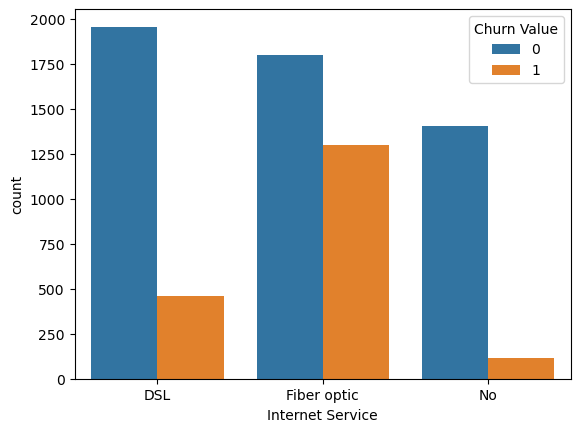

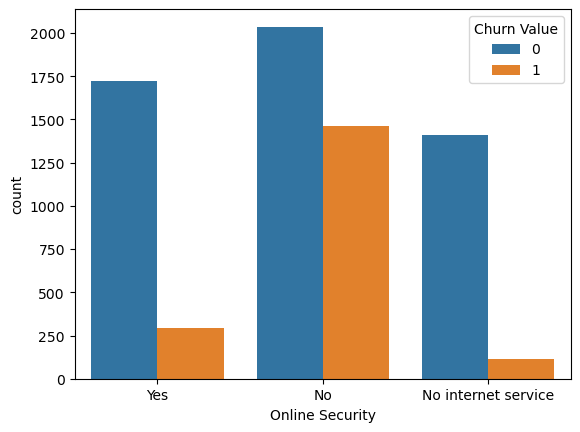

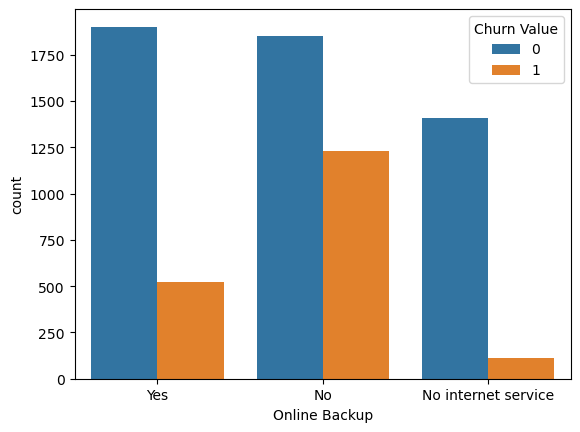

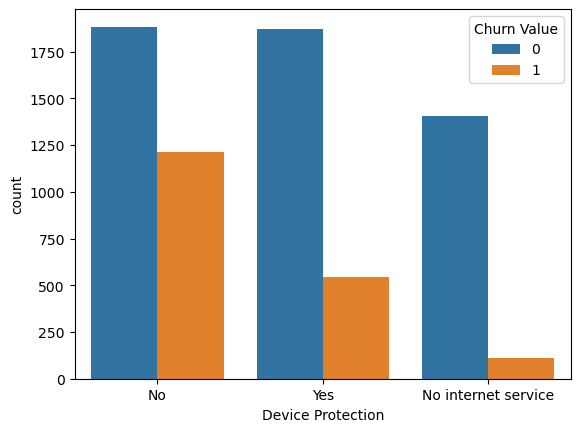

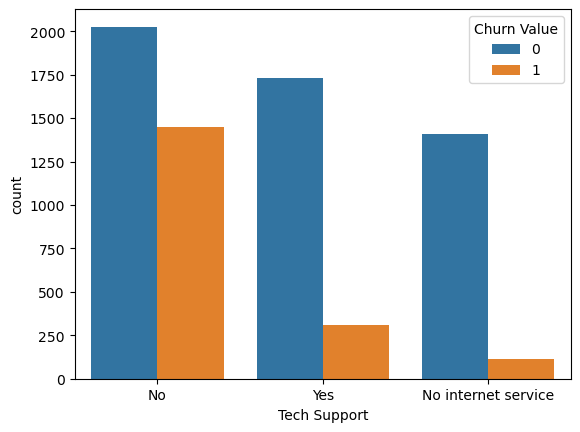

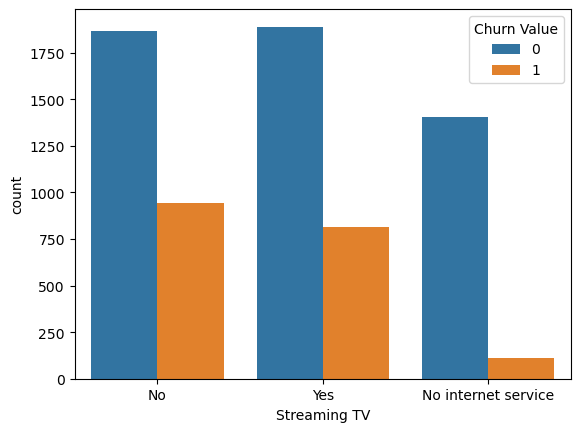

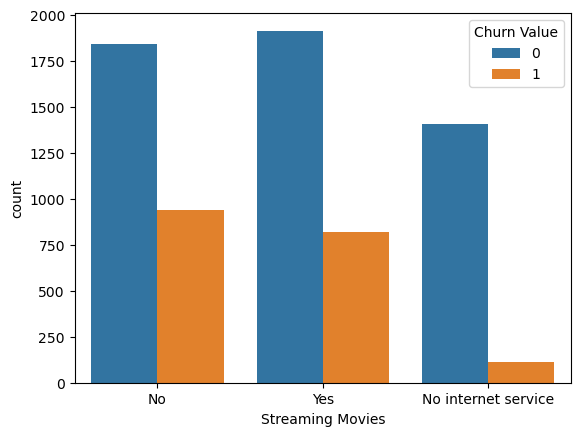

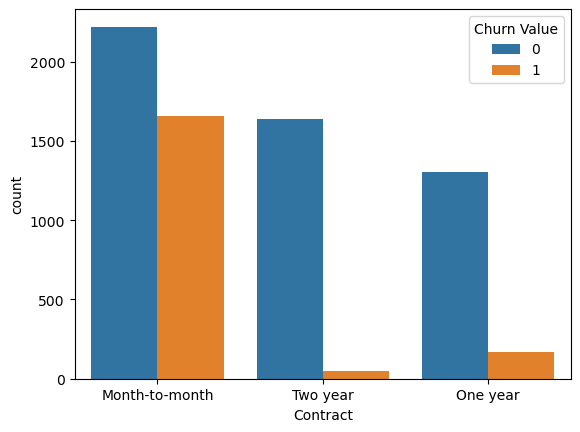

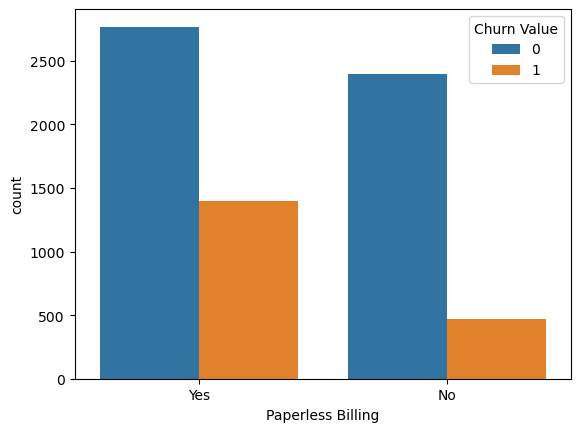

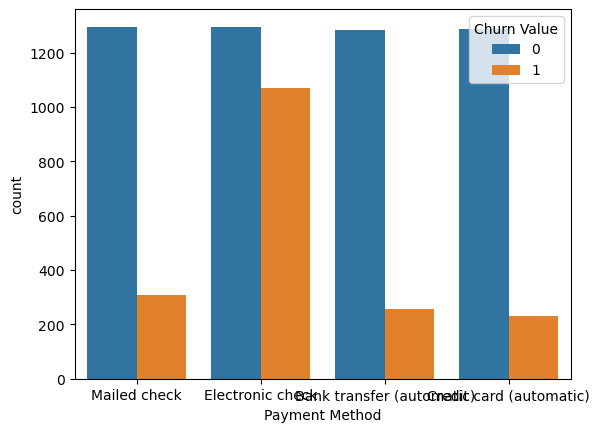

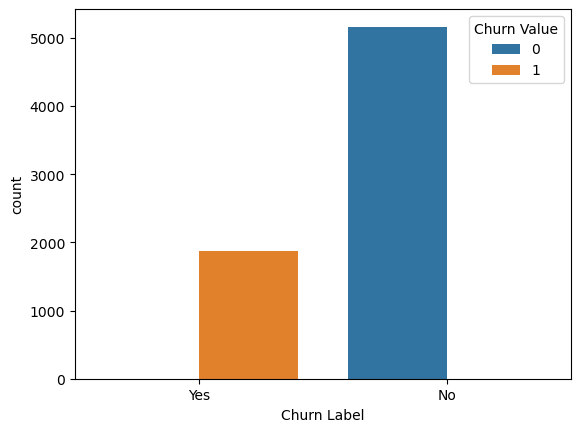

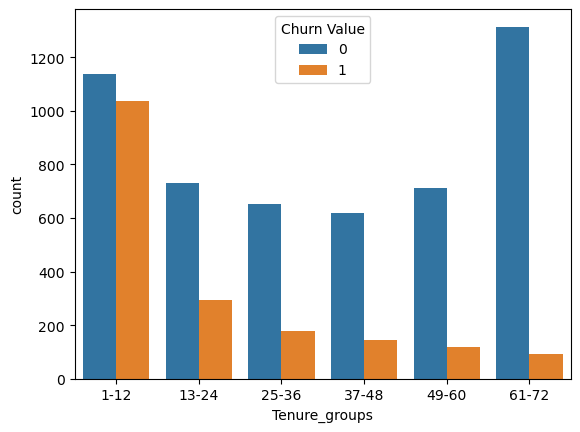

In [31]:
for i, predictor in enumerate(telco_data.drop(columns=['Count','Churn Value','Monthly Charges','Total Charges','Zip Code','Lat Long','Latitude','Longitude','Churn Score','CLTV','Churn Reason','City'])):
    plt.figure(i)
    sns.countplot(data= telco_data,x=predictor,hue='Churn Value')

"""**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0"""


In [32]:
telco_data.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure_groups'],
      dtype='object')

In [33]:
telco_data['Churn Value']= np.where(telco_data['Churn Value']==1,'Yes','No')

"""**3.** Convert all the categorical variables into dummy variables"""

In [34]:
telco_data_dummy= pd.get_dummies(telco_data)
telco_data_dummy.head()

,Count,Zip Code,Latitude,Longitude,Monthly Charges,Total Charges,Churn Score,CLTV,Country_United States,State_California,...,Churn Reason_Poor expertise of phone support,Churn Reason_Price too high,Churn Reason_Product dissatisfaction,Churn Reason_Service dissatisfaction,Tenure_groups_1-12,Tenure_groups_13-24,Tenure_groups_25-36,Tenure_groups_37-48,Tenure_groups_49-60,Tenure_groups_61-72
0,1,90003,33.964131,-118.272783,53.85,108.15,86,3239,1,1,...,0,0,0,0,1,0,0,0,0,0
1,1,90005,34.059281,-118.307420,70.70,151.65,67,2701,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1,90006,34.048013,-118.293953,99.65,820.50,86,5372,1,1,...,0,0,0,0,1,0,0,0,0,0
3,1,90010,34.062125,-118.315709,104.80,3046.05,84,5003,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,90015,34.039224,-118.266293,103.70,5036.30,89,5340,1,1,...,0,0,0,0,0,0,0,0,1,0


In [35]:
telco_data.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure_groups'],
      dtype='object')

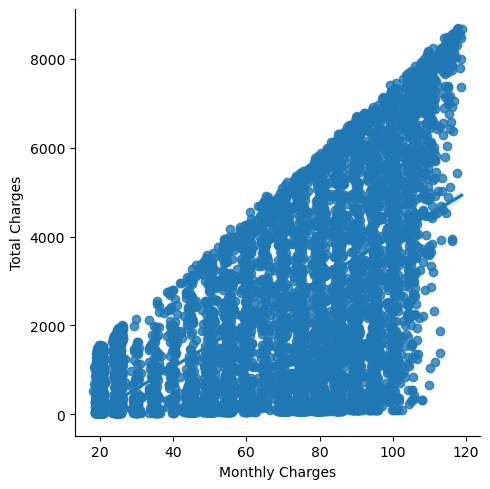

In [36]:
sns.lmplot(data= telco_data_dummy,x= 'Monthly Charges',y='Total Charges')

Text(0.5, 1.0, 'Monthly charges by churn')

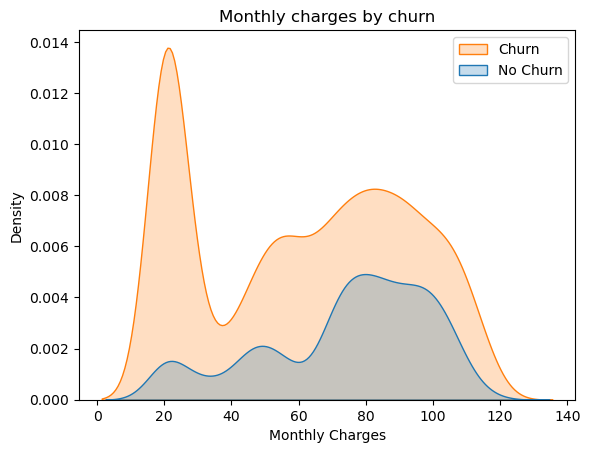

In [37]:
Mth = sns.kdeplot(data=telco_data,x='Monthly Charges',hue='Churn Value',fill=True)

Mth.legend(["Churn","No Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

"""**Insight:** Churn is high when Monthly Charges ar high"""


Text(0.5, 1.0, 'Total charges by churn')

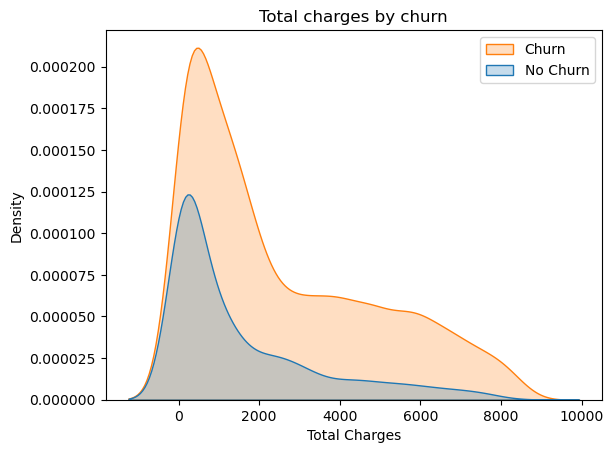

In [38]:
Tot = sns.kdeplot(telco_data,x='Total Charges',hue='Churn Value',fill=True)
                

Tot.legend(["Churn","No Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

"""**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **
"""

In [39]:
telco_data.corr()



/tmp/ipykernel_20/1031010092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  telco_data.corr()


,Count,Zip Code,Latitude,Longitude,Monthly Charges,Total Charges,Churn Score,CLTV
Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zip Code,NaN,1.000000,0.895795,-0.784273,-0.004956,-0.001462,-0.002538,-0.004512
Latitude,NaN,0.895795,1.000000,-0.876777,-0.020302,-0.010313,-0.007471,0.000137
Longitude,NaN,-0.784273,-0.876777,1.000000,0.024513,0.009047,0.003724,0.000953
Monthly Charges,NaN,-0.004956,-0.020302,0.024513,1.000000,0.651065,0.133556,0.098565
Total Charges,NaN,-0.001462,-0.010313,0.009047,0.651065,1.000000,-0.124312,0.341837
Churn Score,NaN,-0.002538,-0.007471,0.003724,0.133556,-0.124312,1.000000,-0.080837
CLTV,NaN,-0.004512,0.000137,0.000953,0.098565,0.341837,-0.080837,1.000000


/tmp/ipykernel_20/1118928047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(telco_data.corr(),annot=False,linewidth=.5,cmap='Paired')


<Axes: >

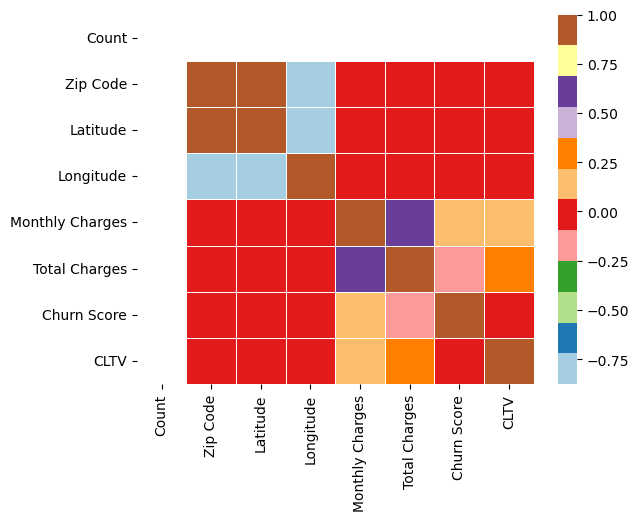

In [40]:
sns.heatmap(telco_data.corr(),annot=False,linewidth=.5,cmap='Paired')

"""Bivariate analysis"""

In [41]:
telco_data.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Tenure_groups
0,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Yes,Mailed check,53.85,108.15,Yes,Yes,86,3239,Competitor made better offer,1-12
1,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Yes,Electronic check,70.70,151.65,Yes,Yes,67,2701,Moved,1-12
2,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Electronic check,99.65,820.50,Yes,Yes,86,5372,Moved,1-12
3,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Electronic check,104.80,3046.05,Yes,Yes,84,5003,Moved,25-36
4,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,Yes,89,5340,Competitor had better devices,49-60


In [42]:
#df_target0= telco_data.loc[telco_data['Churn Value']==0]

df1_target0=telco_data.loc[telco_data["Churn Value"]=='No']
df1_target1=telco_data.loc[telco_data["Churn Value"]=='Yes']


In [43]:
print(df1_target0.shape[0])

print(df1_target1.shape[0])

5163
1869


In [44]:
telco_data.columns

Index(['Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure_groups'],
      dtype='object')

Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason', 'Tenure_group

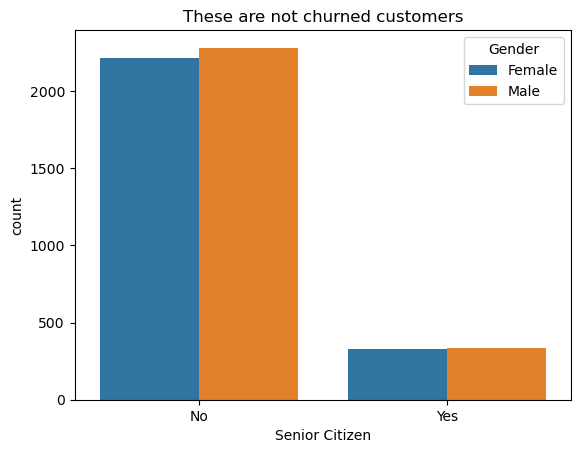

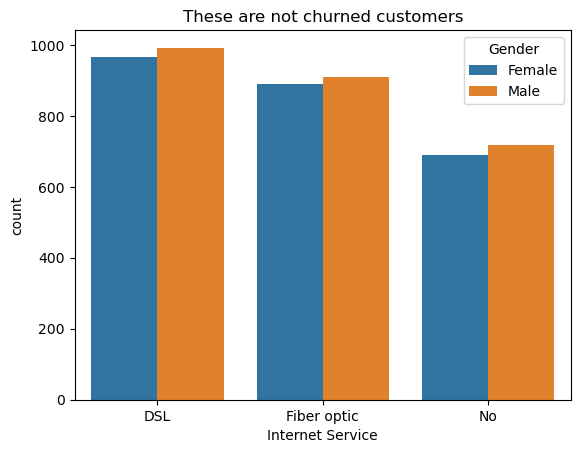

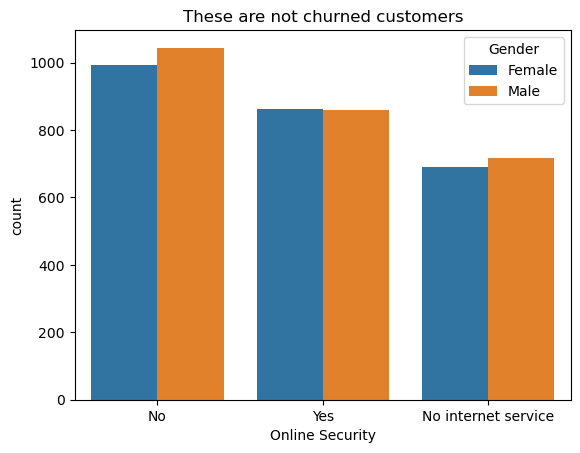

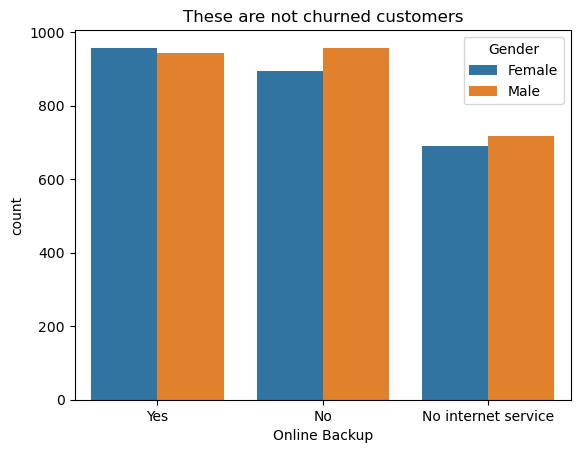

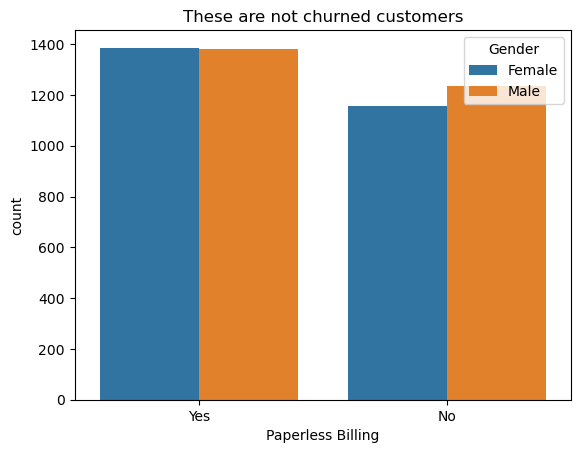

In [45]:
list=['Senior Citizen','Internet Service','Online Security','Online Backup','Paperless Billing']

for i, plot in enumerate(telco_data[list]):
    plt.figure(i)
    plt.title('These are not churned customers')
    sns.countplot(data=df1_target0,x=list[i],hue='Gender')

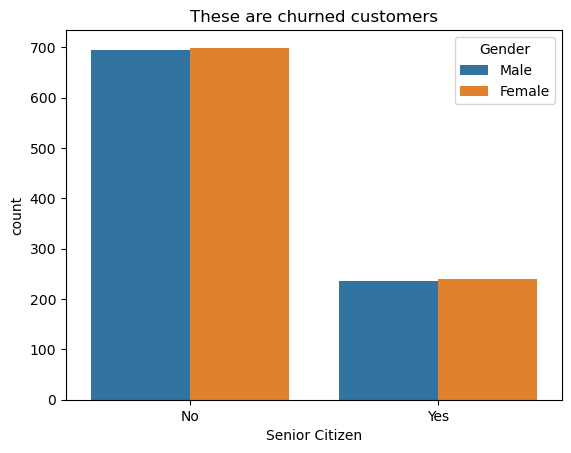

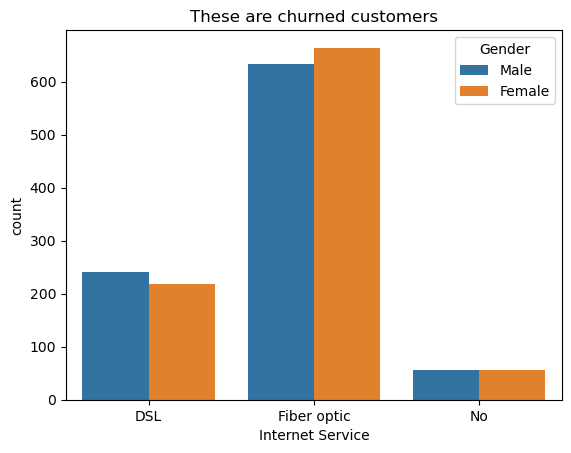

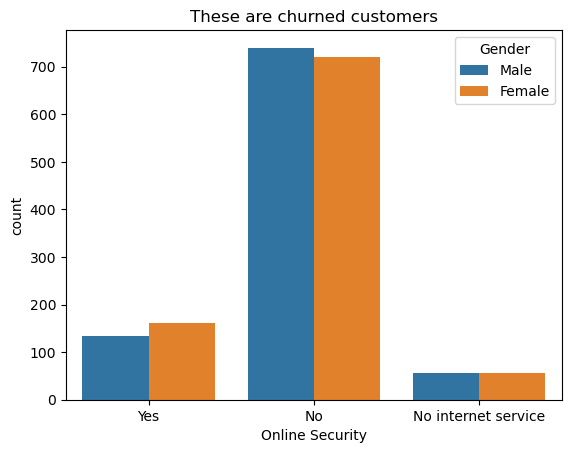

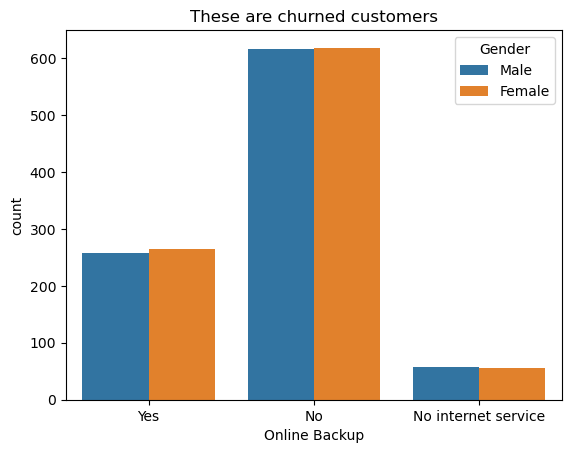

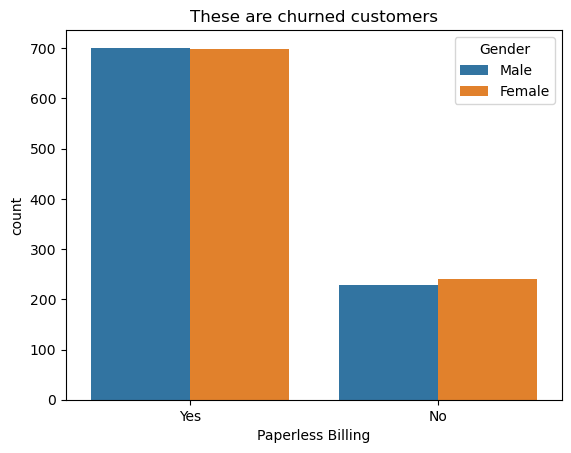

In [46]:
list=['Senior Citizen','Internet Service','Online Security','Online Backup','Paperless Billing']

for i, plot in enumerate(telco_data[list]):
    plt.figure(i)
    plt.title('These are churned customers')
    sns.countplot(data=df1_target1,x=list[i],hue='Gender')

"""# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)
"""